# Bump Chart

In [1]:
import leaderbot as lb
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [9]:
# Load form file instead
# filename = '../benchmark/models.pkl'
filename = '../benchmark/models_train_full.pkl'
with open(filename, 'rb') as f:
    results = pickle.load(f)

models = results['models']
data = results['data']

In [10]:
ranks = []

for model in models:
    ranks.append(model.rank())

ranks = np.array(ranks)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import texplot


# model_order = [11, 7, 10, 6, 9, 5, 8, 4, 3, 2, 1, 0]
#model_order = [8, 5, 2, 7, 4, 1, 6, 3, 0]
model_order = np.array([30, 18, 26, 14, 22, 10, 6, 3, 19, 7, 4, 1]) - 1


ranks_model_order = ranks[model_order, :]

def plot_bump_chart(rank_range, ax=None, save_suffix='', latex=False):

    with texplot.theme(rc={'font.family': 'sans-serif'}, use_latex=latex):

        if ax is None:
            fig, ax = plt.subplots(figsize=(4.5, (rank_range[1] - rank_range[0]) * 16 / 100))
        
        n_agents = ranks_model_order.shape[1]
        n_models = ranks_model_order.shape[0]
        
        # cmap = plt.cm.flag
        # colors = [cmap(i) for i in np.linspace(0, 1, 20)
        #           if not np.all(np.isclose(cmap(i)[:3], [1, 1, 1], atol=0.1))]
        
        colors = ['black', 'firebrick', 'orangered', 'darkgoldenrod', 'royalblue', 'mediumblue']
        fontsize = 9
        
        for i in range(n_agents):
            # Entity ranked i-th in the first model
            entity = ranks_model_order[0, i]
            
            # Find where this entity is ranked in other models
            ranks_over_models = []
            for j in range(n_models):
                # Find its rank (convert to 1-based index)
                rank_in_j = np.where(ranks_model_order[j] == entity)[0][0] + 1 
                ranks_over_models.append(rank_in_j)
        
            color = colors[i % len(colors)]
            ax.plot(range(n_models), np.array(ranks_over_models) - rank_range[0],
                    marker='o',
                    markerfacecolor='white', markeredgecolor=color,
                    markeredgewidth=1.75, markersize=4.5,
                    label=f'Entity {entity}',
                    color=color)
        
        agent_names = data['models']

        for i in range(rank_range[0], rank_range[1]):
            entity = ranks[0, i]  # Replace with your entity identifier

            name = agent_names[ranks[0, i]]
            name_length = 17
            if len(name) > name_length:
                name = name[:(name_length-3)] + '...'
            ax.text(-0.13, i - rank_range[0] + 1, f'{name:>20s}', ha='right', 
                    va='center',
                    transform=ax.get_yaxis_transform(), fontsize=fontsize)
            ax.text(0.0, i - rank_range[0] + 1, f'{i+1:>3d}', ha='right', va='center',
                    transform=ax.get_yaxis_transform(), fontsize=fontsize)
    
        for i in range(n_models):
            ax.text(i, 0, f'Model {model_order[i]+1}', ha='center', va='bottom',
                rotation=90, fontsize=fontsize)
        
        ax.set_ylim([0.5, rank_range[1] - rank_range[0] + 0.5])
        ax.invert_yaxis()
    
        ax.xaxis.set_ticks([])
        ax.set_xticklabels([])
        ax.yaxis.set_ticks([])
        ax.set_yticklabels([])
        
        ax.yaxis.set_ticks_position('right')
        ax.yaxis.set_label_position('right')
        ax.xaxis.set_ticks_position('top')
        ax.xaxis.set_label_position('top')
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        if ax is None:
            plt.tight_layout()
        
            texplot.show_or_save_plot(plt, default_filename='bump_chart.pdf',
                                      transparent_background=True, dpi=200,
                                      show_and_save=True, verbose=True)

Plot saved to "/home/sia/work/github/arenaranking/notebooks/bump_chart.pdf".


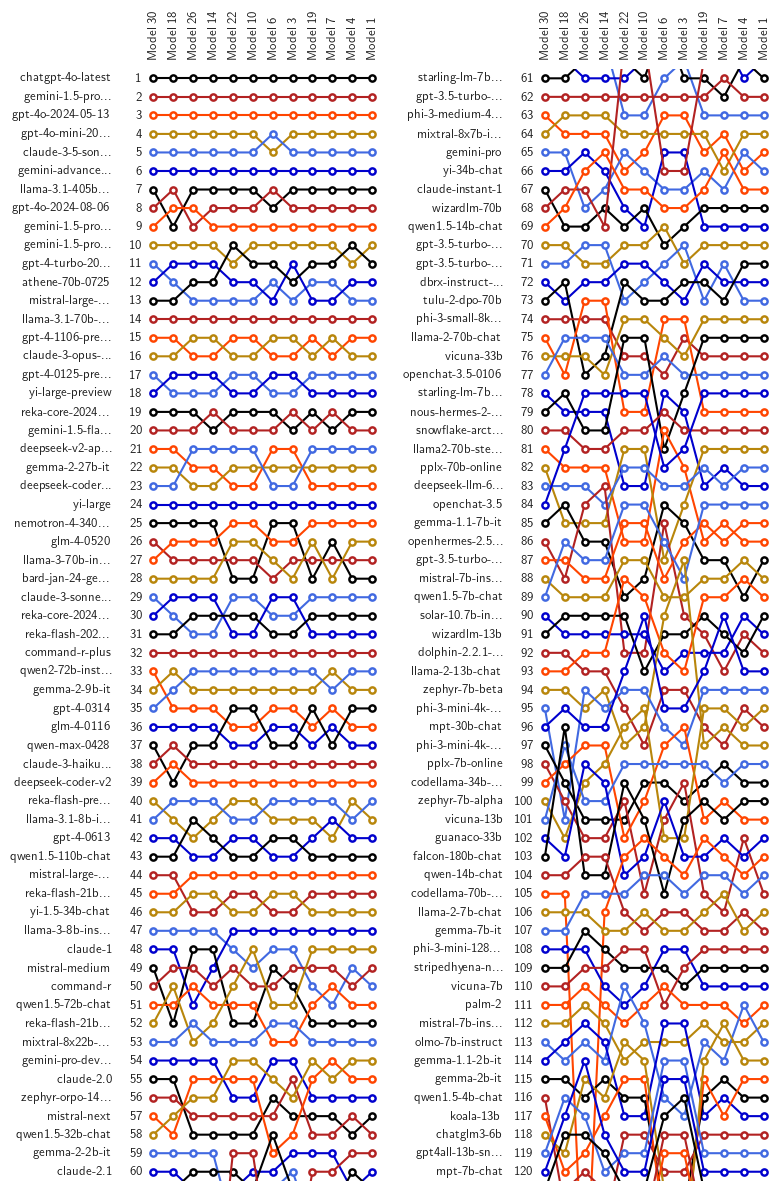

In [18]:
latex=True

#fig, ax = plt.subplots(ncols=2, figsize=(9, 10))
# fig, ax = plt.subplots(ncols=2, figsize=(8, 11))
fig, ax = plt.subplots(ncols=2, figsize=(8, 12))

plot_bump_chart(rank_range=[0, 60], ax=ax[0], latex=latex)
plot_bump_chart(rank_range=[60, 120], ax=ax[1], latex=latex)
plt.tight_layout()

texplot.show_or_save_plot(plt, default_filename='bump_chart.pdf',
                                      transparent_background=True, dpi=200,
                                      show_and_save=True, verbose=True)